**author**: lukethompson@gmail.com<br>
**date**: 7 Oct 2017<br>
**language**: Python 3.5<br>
**license**: BSD3<br>

## effect_size_main.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Merging the cleaned mapping file (output of clean_map_emp.py) with alpha diversity for redundancy analysis

In [46]:
path_map = '../../data/mapping-files/emp_qiime_mapping_qc_filtered.tsv'
df_map = pd.read_csv(path_map, sep='\t', index_col=0)

/Users/luke.thompson/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (46,47,48,49,50,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### for adiv

In [47]:
# df_qrt is (now also) metadata in deciles for alpha-diversity analysis
df_qrt = pd.read_csv('../../data/effect-size/emp_qiime_mapping_qc_filtered.tsv.quartiles.tsv', sep='\t', index_col=0)
#df_dec = pd.read_csv('../../data/effect-size/emp_qiime_mapping_qc_filtered.tsv.deciles.tsv', sep='\t', index_col=0)

In [48]:
df_qrt['adiv_observed_otus'] = [df_map['adiv_observed_otus'][i] for i in df_qrt.index]
df_qrt.drop('oxygen_mg_per_l', axis=1, inplace=True)

In [49]:
path_adiv = '../../data/effect-size/emp_qiime_mapping_qc_filtered.quartiles.adiv.tsv'
df_qrt.to_csv(path_adiv, sep='\t')

#### for bdiv - unweighted

In [7]:
# df_qrt is metadata in quartiles for beta-diversity analysis
df_qrt = pd.read_csv('../../data/effect-size/emp_qiime_mapping_qc_filtered.tsv.quartiles.tsv', sep='\t', index_col=0)

In [8]:
path_bdiv = '../../data/beta-div/emp_90_gg_1k_unweighted_unifrac.txt.pc.first_ten'
df_bdiv = pd.read_csv(path_bdiv, sep='\t', index_col=0, header=None)
df_bdiv.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [9]:
for col in ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']:
    df_qrt[col] = [df_bdiv[col][i] for i in df_qrt.index]

In [10]:
path_bdiv = '../../data/effect-size/emp_qiime_mapping_qc_filtered.quartiles.bdiv_uw.tsv'
df_qrt.to_csv(path_bdiv, sep='\t')

#### for bdiv - weighted

In [11]:
# df_qrt is metadata in quartiles for beta-diversity analysis
df_qrt = pd.read_csv('../../data/effect-size/emp_qiime_mapping_qc_filtered.tsv.quartiles.tsv' , sep='\t', index_col=0)

In [12]:
path_bdiv = '../../data/beta-div/emp_90_gg_1k_weighted_unifrac.txt.pc.first_ten'
df_bdiv = pd.read_csv(path_bdiv, sep='\t', index_col=0, header=None)
df_bdiv.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [13]:
# df_qrt is metadata in quartiles for beta-diversity analysis
for col in ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']:
    df_qrt[col] = [df_bdiv[col][i] for i in df_qrt.index]

In [14]:
path_bdiv = '../../data/effect-size/emp_qiime_mapping_qc_filtered.quartiles.bdiv_w.tsv'
df_qrt.to_csv(path_bdiv, sep='\t')

### Exploring the cleaned mapping file (output of clean_map_emp.py)

In [15]:
df_dec.study_id.value_counts()

1883.0    2438
550.0     1957
894.0     1922
2192.0    1599
1288.0    1483
2229.0    1292
945.0     1103
755.0      893
990.0      698
1521.0     688
1642.0     625
1774.0     599
1632.0     527
1736.0     502
1694.0     450
2382.0     400
925.0      361
1622.0     348
933.0      323
1453.0     298
1064.0     285
678.0      271
1235.0     258
1721.0     255
864.0      229
1024.0     227
1748.0     221
940.0      219
1747.0     184
1621.0     180
722.0      175
2182.0     164
1696.0     157
1030.0     147
1674.0     146
1240.0     141
1665.0     135
1579.0     126
1773.0     121
1035.0     113
1197.0     103
2338.0     103
1526.0      95
1056.0      92
1242.0      91
963.0       91
638.0       89
1034.0      89
1481.0      88
723.0       85
804.0       78
1692.0      75
Name: study_id, dtype: int64

In [16]:
df_dec.host_scientific_name.value_counts()

Not applicable            12941
Homo sapiens               3612
Ecklonia radiata            936
Rusa unicolor               906
Phyllospora comosa          656
Oryza sativa                615
Syncerus caffer caffer      502
Macropus sp.                460
Pemphiginae                 450
Pygathrix nemaeus           298
Apis mellifera              285
Oryctolagus cuniculus       259
Bos taurus                  180
Vombatidae                  169
Ateles geoffroyi            160
Varanus komodoensis         155
Catostomus                  147
Canis lupus familiaris      104
Iguana iguana                91
Pica pica                    87
Carollia perspicillata       76
Name: host_scientific_name, dtype: int64

In [17]:
df_dec.latitude_deg.value_counts()

4.0    3581
7.0    2792
2.0    2593
0.0    2557
6.0    2503
9.0    2472
1.0    2429
3.0    2422
8.0    2189
5.0    1363
Name: latitude_deg, dtype: int64

In [18]:
df_dec.longitude_deg.value_counts()

1.0    4396
8.0    2867
5.0    2679
3.0    2644
0.0    2495
7.0    2494
6.0    2315
9.0    2095
2.0    1828
4.0    1088
Name: longitude_deg, dtype: int64

In [19]:
df_dec.envo_biome_3.value_counts()

dense settlement biome         7300
Not applicable                 5323
freshwater lake biome          4372
freshwater river biome         2247
cropland biome                 1843
rangeland biome                 895
subtropical shrubland biome     527
village biome                   502
subtropical woodland biome      450
broadleaf forest biome          379
marine benthic biome            314
montane grassland biome         229
polar desert biome              147
tropical shrubland biome        126
marine pelagic biome             85
mixed forest biome               78
Name: envo_biome_3, dtype: int64

In [20]:
df_dec.empo_3.value_counts()

Water (non-saline)       5080
Soil (non-saline)        4376
Animal distal gut        4196
Animal surface           3454
Plant surface            1615
Surface (non-saline)     1289
Animal secretion         1285
Water (saline)            685
Plant rhizosphere         632
Sediment (saline)         629
Sediment (non-saline)     553
Animal proximal gut       384
Animal corpus             338
Plant corpus              177
Surface (saline)          117
Aerosol (non-saline)       87
Name: empo_3, dtype: int64

In [21]:
df_dec.temperature_deg_c.value_counts()

7.0    775
3.0    759
0.0    725
1.0    722
2.0    719
5.0    716
9.0    716
6.0    716
4.0    677
8.0    660
Name: temperature_deg_c, dtype: int64

In [22]:
df_dec.ph.value_counts()

2.0    495
0.0    444
4.0    437
6.0    420
8.0    416
9.0    411
7.0    410
3.0    400
1.0    398
5.0    316
Name: ph, dtype: int64

In [23]:
df_dec.salinity_psu.value_counts()

4.0    83
3.0    69
8.0    69
7.0    65
1.0    65
0.0    63
2.0    61
9.0    54
6.0    54
Name: salinity_psu, dtype: int64

In [25]:
#df_dec.oxygen_mg_per_l.value_counts()

In [26]:
df_dec.nitrate_umol_per_l.value_counts()

5.0    240
0.0    223
7.0    198
4.0    195
3.0    193
9.0    191
8.0    190
2.0    188
1.0    170
6.0    145
Name: nitrate_umol_per_l, dtype: int64

### Plotting effect size results

In [2]:
sns.set_style('ticks', {'ytick.color': 'white'})
sns.set_context('poster', font_scale=1.5)
mycolor = sns.xkcd_rgb['light blue']

In [3]:
cols = ['study_id', 'host_scientific_name',
    'latitude_deg', 'longitude_deg',
    'envo_biome_3', 'empo_3', 
    'temperature_deg_c', 'ph', 'salinity_psu',
    'oxygen_mg_per_l', 'nitrate_umol_per_l']

#### Alpha-div

In [4]:
results_q = pd.read_csv('../../data/effect-size/' +
                      'mannwhitneyu.alpha_map.adiv_observed_otus.quartiles.tsv', 
                      sep='\t', index_col=0)

In [5]:
results_d = pd.read_csv('../../data/effect-size/' +
                      'mannwhitneyu.alpha_map.adiv_observed_otus.deciles.tsv', 
                      sep='\t', index_col=0)

In [7]:
myresults_q = results_q.loc[results_q['column_name'].isin(cols)]
myresults_q = myresults_q.sort_values('effect_size', ascending=False)

In [8]:
myresults_d = results_d.loc[results_d['column_name'].isin(cols)]
myresults_d = myresults_d.sort_values('effect_size', ascending=False)

In [9]:
dict_colors = {'study_id':sns.color_palette('Paired', 12)[1], 'empo_3':sns.color_palette('Paired', 12)[3], 
               'envo_biome_3':sns.color_palette('Paired', 12)[5],'latitude_deg':sns.color_palette('Paired', 12)[7], 
               'longitude_deg':sns.color_palette('Paired', 12)[9], 'host_scientific_name':sns.color_palette('Paired', 12)[0], 
               'salinity_psu':sns.color_palette('Paired', 12)[2], 'temperature_deg_c':sns.color_palette('Paired', 12)[4],
               'ph':sns.color_palette('Paired', 12)[6], 'nitrate_umol_per_l':sns.color_palette('Paired', 12)[8], 
               'oxygen_mg_per_l':sns.color_palette('Paired', 12)[10]}

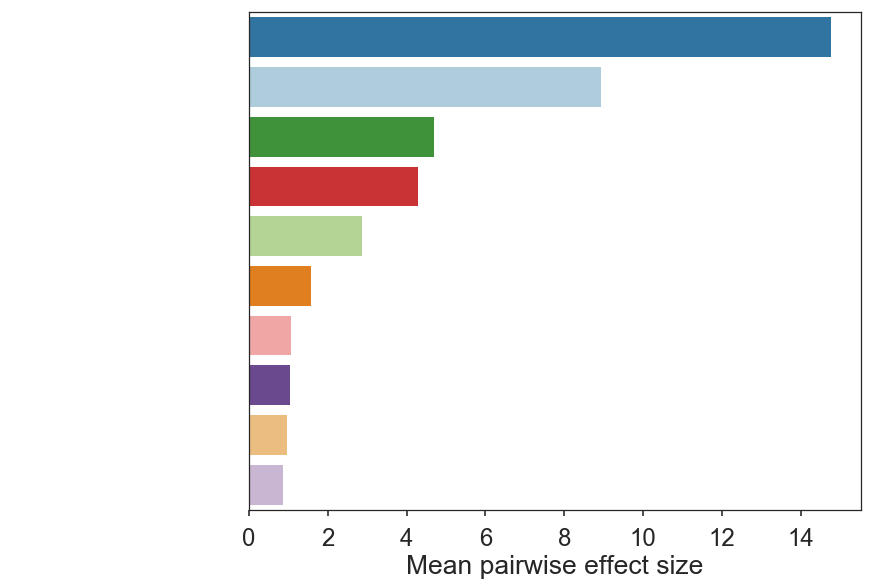

In [11]:
sns.barplot(x='effect_size', y='column_name', data=myresults_d, palette=dict_colors)
plt.xlabel('Mean pairwise effect size')
plt.ylabel('')
plt.tight_layout()
plt.savefig('adiv_effect_size_deciles.pdf')

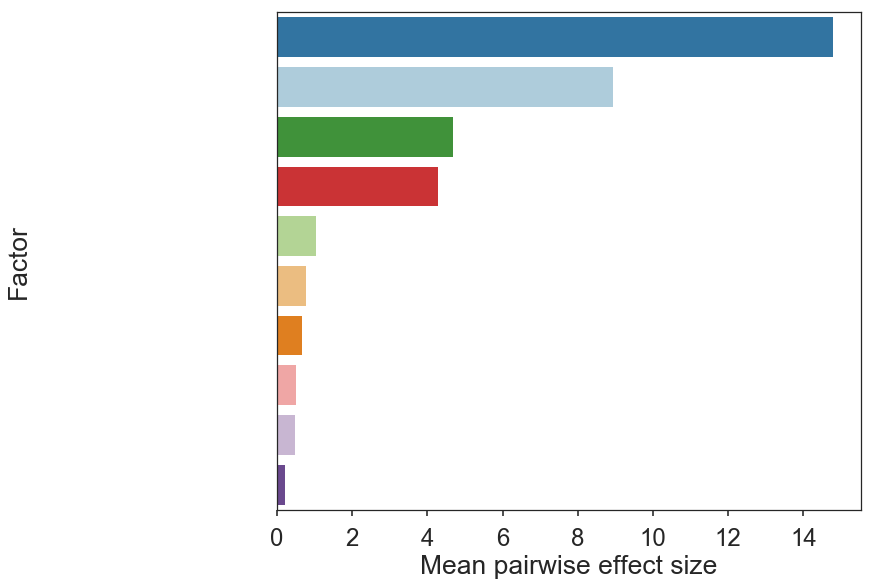

In [12]:
sns.barplot(x='effect_size', y='column_name', data=myresults_q, palette=dict_colors)
plt.xlabel('Mean pairwise effect size')
plt.ylabel('Factor')
plt.tight_layout()
plt.savefig('adiv_effect_size_quartiles.pdf')

#### Beta-div

In [13]:
results_w = pd.read_csv('../../data/effect-size/' +
                      'emp_90_gg_1k_weighted_unifrac.emp_qiime_mapping_qc_filtered.quartiles.tsv', 
                      sep='\t', index_col=0)

In [14]:
myresults_w = results_w.loc[results_w['column_name'].isin(cols)]
myresults_w = myresults_w.sort_values('effect_size', ascending=False)

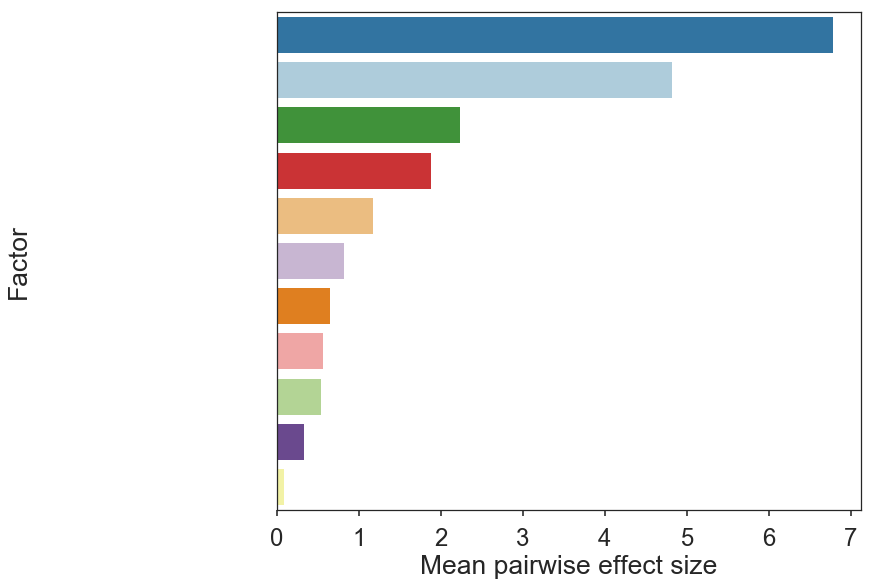

In [15]:
sns.barplot(x='effect_size', y='column_name', data=myresults_w, palette=dict_colors)
plt.xlabel('Mean pairwise effect size')
plt.ylabel('Factor')
plt.tight_layout()
plt.savefig('bdiv_weighted_effect_size_quartiles.pdf')

In [16]:
results_uw = pd.read_csv('../../data/effect-size/' +
                      'emp_90_gg_1k_unweighted_unifrac.emp_qiime_mapping_qc_filtered.quartiles.tsv', 
                      sep='\t', index_col=0)

In [17]:
myresults_uw = results_uw.loc[results_uw['column_name'].isin(cols)]
myresults_uw = myresults_uw.sort_values('effect_size', ascending=False)

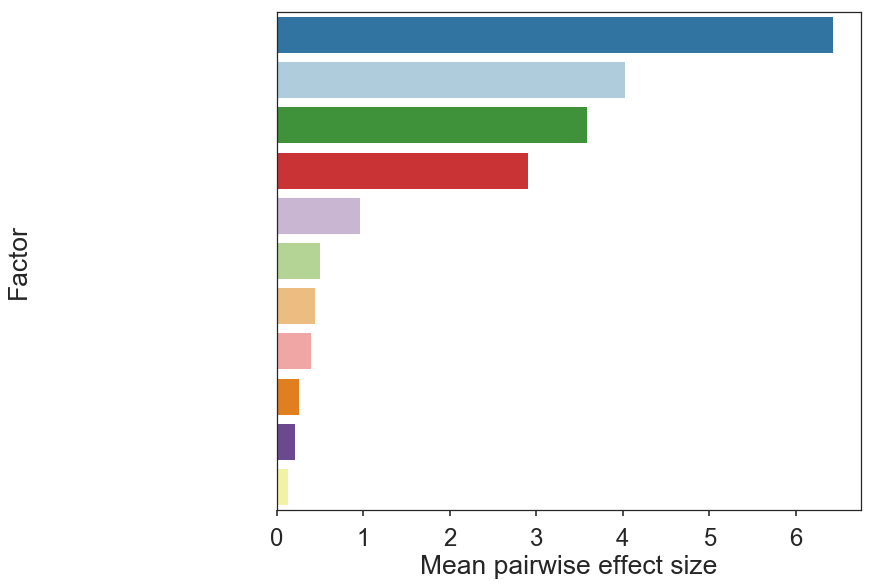

In [18]:
sns.barplot(x='effect_size', y='column_name', data=myresults_uw, palette=dict_colors)
plt.xlabel('Mean pairwise effect size')
plt.ylabel('Factor')
plt.tight_layout()
plt.savefig('bdiv_unweighted_effect_size_quartiles.pdf')

### Plotting RDA results

In [17]:
sns.set_style('ticks', {'ytick.color': 'black'})

In [18]:
path_rda = '../../data/effect-size/rda_values.xlsx'

In [19]:
df_rda = pd.read_excel(path_rda)

In [20]:
df_rda.fillna(0, inplace=True)

In [21]:
df_rda

,study_id,empo_3,envo_biome_3,longitude_deg,latitude_deg,response,incl_study_id
alpha_with_study_id,0.6957,0.0616,0.0136,0.0011,0.0000,alpha: observed seqs,yes
alpha_without_study_id,0.0000,0.5842,0.0658,0.0175,0.0159,alpha: observed seqs,no
beta_uw_with_study_id,0.6407,0.0920,0.0030,0.0001,0.0007,beta: unweighted unifrac,yes
beta_uw_without_study_id,0.0000,0.5072,0.1075,0.0185,0.0335,beta: unweighted unifrac,no
beta_w_with_study_id,0.5412,0.1041,0.0017,0.0000,0.0024,beta: weighted unifrac,yes
beta_w_without_study_id,0.0000,0.4712,0.0816,0.0201,0.0000,beta: weighted unifrac,no


In [22]:
mycolors = ["dark grey", "windows blue", "amber", "faded green", "dusty purple"]

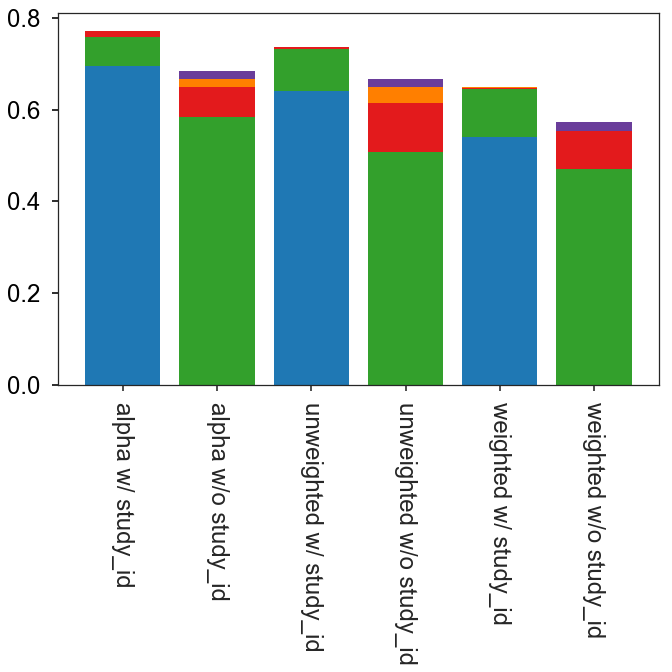

In [23]:
plt.figure(figsize=(10,10))

plt.bar(np.arange(6), df_rda.study_id, color=dict_colors['study_id'])
bottom = df_rda.study_id
plt.bar(np.arange(6), df_rda.empo_3, bottom=bottom, color=dict_colors['empo_3'])
bottom = bottom + df_rda.empo_3
plt.bar(np.arange(6), df_rda.envo_biome_3, bottom=bottom, color=dict_colors['envo_biome_3'])
bottom = bottom + df_rda.envo_biome_3
plt.bar(np.arange(6), df_rda.latitude_deg, bottom=bottom, color=dict_colors['latitude_deg'])
bottom = bottom + df_rda.latitude_deg
plt.bar(np.arange(6), df_rda.longitude_deg, bottom=bottom, color=dict_colors['longitude_deg'])

plt.xticks(np.arange(6), ['alpha w/ study_id', 'alpha w/o study_id', 'unweighted w/ study_id', 'unweighted w/o study_id', 
                          'weighted w/ study_id', 'weighted w/o study_id'], rotation=270)

plt.tight_layout()

plt.savefig('rda.pdf')